# 주제 : 다중 선형회귀 (Multiple Linear Regression)
---

* 독립 변수가 2개 이상인 데이터의 선형 회귀문제

### 문제 1. 라이브러리

In [ ]:
import tensorflow as tf

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# warning 꺼주는 작업
import warnings
warnings.filterwarnings(action='ignore')

### 문제 2. 데이터 만들기

In [ ]:
x1_data = [1, 0, 3, 0, 5]
x2_data = [0, 2, 0, 4, 0]
y_data = [1, 2, 3, 4, 5]

### 문제 3. 경사하강법

가설: $$  \hat{y}=W_1x_1 + W_2x_2 +b  $$

#### 변수 초기화

In [ ]:
W1 = tf.Variable(tf.random.uniform((1,), -10.0, 10.0))
W2 = tf.Variable(tf.random.uniform((1,), -10.0, 10.0))
b = tf.Variable(tf.random.uniform((1,), -10.0, 10.0))

learning_rate = tf.constant(0.001)
epochs = 1000
costs = []

In [ ]:
# 가중치가 배열 형태 

print(W1.numpy(), W2.numpy(), b.numpy())

[5.4233723] [-4.4943905] [4.189768]


#### 경사하강법

In [ ]:
# 변수초기화
W1 = tf.Variable(tf.random.uniform((1,), -10.0, 10.0))
W2 = tf.Variable(tf.random.uniform((1,), -10.0, 10.0))
b = tf.Variable(tf.random.uniform((1,), -10.0, 10.0))

learning_rate = tf.constant(0.001)
epochs = 1000
costs = []

In [ ]:
for i in range(epochs+1):
  with tf.GradientTape() as tape:
    hypothesis = W1 * x1_data + W2 * x2_data + b
    cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    costs.append(cost.numpy())

  W1_grad, W2_grad, b_grad = tape.gradient(cost, [W1, W2, b])
  W1.assign_sub(learning_rate * W1_grad)
  W2.assign_sub(learning_rate * W2_grad)
  b.assign_sub(learning_rate * b_grad)

  if i % 100 == 0:
    print("{:5} | {:.6f} | {:.4f} | {:.4f} | {:.6}".format(i, cost.numpy(), W1.numpy()[0], W2.numpy()[0], b.numpy()[0]))

    0 | 297.473877 | 2.6859 | -7.6190 | 1.96164
  100 | 52.474243 | 0.9303 | -3.2646 | 2.73183
  200 | 10.838371 | 0.4088 | -1.3970 | 3.05463
  300 | 3.475053 | 0.2489 | -0.5900 | 3.14532
  400 | 2.087007 | 0.2060 | -0.2326 | 3.13016
  500 | 1.755012 | 0.2045 | -0.0653 | 3.07003
  600 | 1.614336 | 0.2181 | 0.0215 | 2.99215
  700 | 1.512270 | 0.2374 | 0.0739 | 2.90829
  800 | 1.421588 | 0.2586 | 0.1114 | 2.82344
  900 | 1.337220 | 0.2802 | 0.1422 | 2.73966
 1000 | 1.258012 | 0.3015 | 0.1696 | 2.65777


#### 비용 변환 시각화

학습이 진행되면서 Cost가 어떻게 변화하는지 그래프로 표시해보자

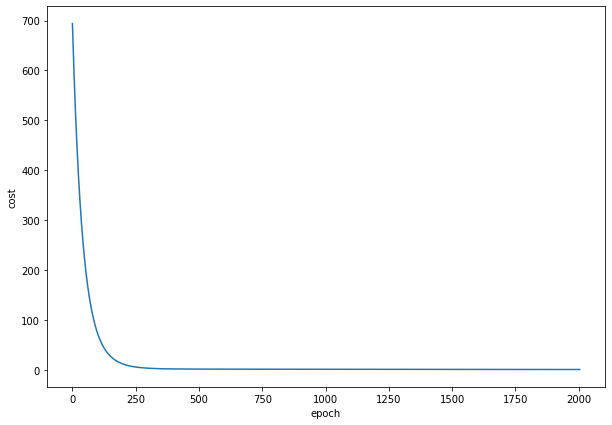

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(costs)
plt.xlabel('epoch')
plt.ylabel('cost')
plt.show()

### 문제 1. 데이터 만들기

* 독립 변수가 3개인 다중 회귀문제 

# 경사하강법 한 번만 해보기

In [ ]:
x1_data = [1, 0, 3, 0, 5]
x2_data = [0, 2, 0, 4, 0]
x3_data = [1, 1, 2, 2, 4]
y_data = [1, 2, 3, 4, 5]

with tf.GradientTape() as tape:
    hypothesis = W1 * x1_data + W2 * x2_data + W3 * x3_data + b
    cost = tf.reduce_mean(tf.square(hypothesis - y_data))

W1_grad, W2_grad, W3_grad, b_grad = tape.gradient(cost, [W1, W2, W3, b])

In [ ]:
# W와 b 계산값을 출력

W1_grad.numpy(), W2_grad.numpy(), W3_grad.numpy(), b_grad.numpy()

(array([-0.15239716], dtype=float32),
 array([-0.35353506], dtype=float32),
 array([-0.40902495], dtype=float32),
 array([1.8021398], dtype=float32))

In [ ]:
# 가중치와 기울기 갱신
learning_rate = 0.01

W1.assign_sub(learning_rate * W1_grad)
W2.assign_sub(learning_rate * W2_grad)
W3.assign_sub(learning_rate * W3_grad)
b.assign_sub(learning_rate * b_grad)

W1.numpy(), W2.numpy(), W3.numpy(), b.numpy()

(array([2.2824671], dtype=float32),
 array([1.0354878], dtype=float32),
 array([-3.573686], dtype=float32),
 array([5.6917048], dtype=float32))

# 경사하강법 lr =1000

In [ ]:
x1_data = [1, 0, 3, 0, 5]
x2_data = [0, 2, 0, 4, 0]
x3_data = [1, 1, 2, 2, 4]
y_data = [1, 2, 3, 4, 5]

#### 경사하강법

In [ ]:
# 변수초기화
W1 = tf.Variable(tf.random.uniform((1,), -10.0, 10.0))
W2 = tf.Variable(tf.random.uniform((1,), -10.0, 10.0))
W3 = tf.Variable(tf.random.uniform((1,), -10.0, 10.0))
b = tf.Variable(tf.random.uniform((1,), -10.0, 10.0))

learning_rate = tf.constant(0.001)
epochs = 1000
costs = []

for i in range(epochs+1):
  with tf.GradientTape() as tape:
    hypothesis = W1 * x1_data + W2 * x2_data + W3 * x3_data + b
    cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    costs.append(cost.numpy())

  W1_grad, W2_grad, W3_grad, b_grad = tape.gradient(cost, [W1, W2,W3, b])
  W1.assign_sub(learning_rate * W1_grad)
  W2.assign_sub(learning_rate * W2_grad)
  W3.assign_sub(learning_rate * W3_grad)
  b.assign_sub(learning_rate * b_grad)

  if i % 100 == 0:
    print("{:5} 번째 | cost: {:.6f} | W1: {:.4f} | W2: {:.4f} | W3: {:.4f} | b: {:.6}".format(i, cost.numpy(), W1.numpy()[0], W2.numpy()[0], W3.numpy()[0], b.numpy()[0]))

    0 번째 | cost: 229.677094 | W1: 5.5635 | W2: -0.1412 | W3: -1.7348 | b: 8.52442
  100 번째 | cost: 13.501703 | W1: 2.6064 | W2: 0.1179 | W3: -3.8823 | b: 7.56942
  200 번째 | cost: 9.857802 | W1: 2.2604 | W2: 0.4675 | W3: -3.9643 | b: 7.33073
  300 번째 | cost: 8.993056 | W1: 2.1996 | W2: 0.6525 | W3: -3.9083 | b: 7.12347
  400 번째 | cost: 8.408121 | W1: 2.1921 | W2: 0.7542 | W3: -3.8526 | b: 6.91226
  500 번째 | cost: 7.894829 | W1: 2.2008 | W2: 0.8202 | W3: -3.8022 | b: 6.70186
  600 번째 | cost: 7.418922 | W1: 2.2152 | W2: 0.8709 | W3: -3.7549 | b: 6.49559
  700 번째 | cost: 6.973259 | W1: 2.2313 | W2: 0.9146 | W3: -3.7097 | b: 6.29478
  800 번째 | cost: 6.555181 | W1: 2.2478 | W2: 0.9546 | W3: -3.6659 | b: 6.09985
  900 번째 | cost: 6.162862 | W1: 2.2639 | W2: 0.9923 | W3: -3.6233 | b: 5.91087
 1000 번째 | cost: 5.794690 | W1: 2.2794 | W2: 1.0284 | W3: -3.5819 | b: 5.72775


#### 결과 시각화 

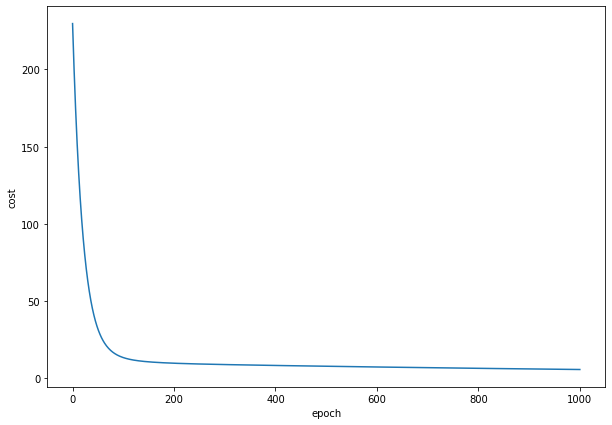

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(costs)
plt.xlabel('epoch')
plt.ylabel('cost')
plt.show()

끝